In [60]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm, Normalize

from scipy.stats import binned_statistic
import os

from general_func import read_my_npy_all, read_my_npy

%matplotlib inline

In [64]:
plt.rcParams.update({'font.size': 20})
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [3]:
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# constants and paths

In [59]:
Emin = 1.

pth0 = '/home/maria/IceCube/crosssections/Genie/crosssec/genie_I3GENIEResultDict'
pth_weights = '/home/maria/IceCube/crosssections/Genie/one_weight/crossec_weights/genie_I3GENIEResultDict'
#'/home/maria/IceCube/crosssections/Genie_Maria/Nov5/test_npy_Wcut0/NuMu_genie_I3GENIEResultDict'

plots_save_pth = '../../../plots/corrections/tot_xsec/ratios_Q2cut/'
files_save_pth = '../../../files/tot_xsec/ratios_Q2cut/'

# read files

In [5]:
pref = ['{:0004d}'.format(i) for i in range(4,200)]
v_genie = read_my_npy(pth0,'.npy',pref)

file 0110.npy doesn`t exists 
file 0163.npy doesn`t exists 


In [22]:
v_genie_weights = read_my_npy_all(pth_weights,'.npy',pref)

file 0110.npy doesn`t exists 
file 0163.npy doesn`t exists 


In [6]:
for k in v_genie.keys():
    v_genie[k] = np.array(v_genie[k])

In [28]:
for k in v_genie_weights.keys():
    v_genie_weights[k] = np.array(v_genie_weights[k])

In [30]:
one_weight_genie = np.array(v_genie_weights['one_weight'])/float(len(v_genie_weights['one_weight']))

ind_nu0 = np.transpose(np.argwhere(v_genie['neu'] == 14))[0]
ind_nubar0 = np.transpose(np.argwhere(v_genie['neu'] == -14))[0]

one_weight_genie[ind_nu0] = one_weight_genie[ind_nu0]/0.7
one_weight_genie[ind_nubar0] = one_weight_genie[ind_nubar0]/0.3

# selection

In [11]:
def sel_by_key(dict_arrs, keys, keys_vals):
    ind0 = np.arange(0,len(dict_arrs[keys[0]]))
    for i in range(len(keys)):
        ind1 = np.transpose(np.argwhere(dict_arrs[keys[i]][ind0]==keys_vals[i]))[0]
        ind0 = ind0[ind1]
    return ind0

def ind_nucl(hitnuc, A, nu_type, cc=True):
    
    genie_sel_keys_list = ['dis',
                            'cc',
                            'neu',
                            'hitnuc',
                            'A',
                            'hitqrk',
                            'sea',
                            'charm',
]
    
    ind = []
    for ch in [True,False]:
        for sea in [True,False]:
            for i in [-6,-5,-4,-3,-2,-1,1,2,3,4,5,6]:
                    genie_sel_keys_vals = [True,
                                          cc,
                                          nu_type,
                                          hitnuc,
                                          A,
                                          i,
                                          sea,
                                          ch,
                                          ]
                    ind.append(sel_by_key(v_genie,genie_sel_keys_list,genie_sel_keys_vals))

    return ind

In [12]:
ind_NuMu_CC_O_n = ind_nucl(hitnuc=2112, A=16, nu_type=14)
ind_NuMu_NC_O_n = ind_nucl(hitnuc=2112, A=16, nu_type=14, cc=False)
ind_NuMu_Bar_CC_O_n = ind_nucl(hitnuc=2112, A=16, nu_type=-14)
ind_NuMu_Bar_NC_O_n = ind_nucl(hitnuc=2112, A=16, nu_type=-14, cc=False)

ind_NuMu_CC_O_n_conc = np.concatenate(ind_NuMu_CC_O_n)
ind_NuMu_NC_O_n_conc = np.concatenate(ind_NuMu_NC_O_n)
ind_NuMu_Bar_CC_O_n_conc = np.concatenate(ind_NuMu_Bar_CC_O_n)
ind_NuMu_Bar_NC_O_n_conc = np.concatenate(ind_NuMu_Bar_NC_O_n)
ind_all_conc_genie_n = np.concatenate((ind_NuMu_CC_O_n_conc,ind_NuMu_NC_O_n_conc,
                                     ind_NuMu_Bar_CC_O_n_conc,ind_NuMu_Bar_NC_O_n_conc))

In [13]:
ind_NuMu_CC_O_p = ind_nucl(hitnuc=2212, A=16, nu_type=14)
ind_NuMu_NC_O_p = ind_nucl(hitnuc=2212, A=16, nu_type=14, cc=False)
ind_NuMu_Bar_CC_O_p = ind_nucl(hitnuc=2212, A=16, nu_type=-14)
ind_NuMu_Bar_NC_O_p = ind_nucl(hitnuc=2212, A=16, nu_type=-14, cc=False)

ind_NuMu_CC_O_p_conc = np.concatenate(ind_NuMu_CC_O_p)
ind_NuMu_NC_O_p_conc = np.concatenate(ind_NuMu_NC_O_p)
ind_NuMu_Bar_CC_O_p_conc = np.concatenate(ind_NuMu_Bar_CC_O_p)
ind_NuMu_Bar_NC_O_p_conc = np.concatenate(ind_NuMu_Bar_NC_O_p)
ind_all_conc_genie_p = np.concatenate((ind_NuMu_CC_O_p_conc,ind_NuMu_NC_O_p_conc,
                                     ind_NuMu_Bar_CC_O_p_conc,ind_NuMu_Bar_NC_O_p_conc))

In [14]:
ind_genie_dis = np.concatenate((ind_all_conc_genie_n,ind_all_conc_genie_p))

# plots

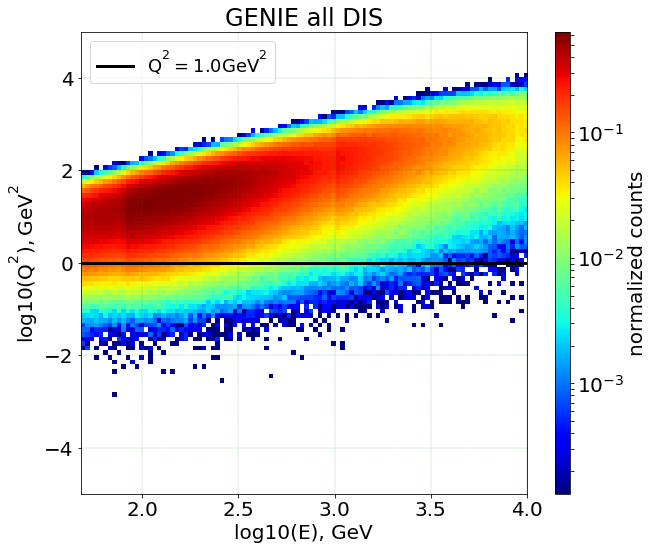

In [109]:
fig = plt.figure(1, figsize=(10, 8.5))
ax = plt.gca()
ax.set_title('GENIE all DIS', fontsize=24)
ax.set_xlabel('log10(E), GeV')
ax.set_ylabel(r'$\mathrm{log10(Q^2), GeV^2}$')

p = ax.hist2d(np.log10(v_genie['Ev'][ind_genie_dis]), 
              np.log10(v_genie['Q2'][ind_genie_dis]), 
              100, [[1.68,4.],[-5.,5]], cmap='jet', 
              norm=LogNorm(), 
              normed=True,
#               weights=genie_one_weight
             )

ax.grid(color='g', linestyle='--', linewidth=0.4, alpha=0.5)
c=fig.colorbar(p[3], shrink=1., aspect=30, label='normalized counts')
ax.legend(fontsize=16, loc=2, ncol=3)

plt.axhline(0., 0, 1, color='k', lw=3, label=r'$\mathrm{Q^2 = 1.0 GeV^2}$')

plt.legend(loc=2, fontsize=18)

plt.show()

In [95]:
left, width = 0.17, 0.75
bottom, height = 0.15, 0.75
bottom_h = bottom + height + 0.02
left_h = left + width + 0.02

rect1 = [left, bottom, width, height]

In [110]:
def gen_weights(ind):
    
    Q2cut = 1.
    ind_Q2cut = np.transpose(np.argwhere(v_genie['Q2'][ind] >= Q2cut))[0]
    
    nbin, be, _ = binned_statistic(np.log10(v_genie['Ev'][ind]), 
                                   one_weight_genie[ind], 
                                   bins=100, range=[1.,4.],
                                   statistic='sum')
    
    nbin_cut, _, _ = binned_statistic(np.log10(v_genie['Ev'][ind][ind_Q2cut]), 
                                      one_weight_genie[ind][ind_Q2cut],  
                                      bins=100, range=[1.,4.],
                                      statistic='sum')
    
    bc = be[:-1]+(be[1]-be[0])/2.
    ratio_cut = nbin_cut/nbin
    fitpar = np.polyfit(bc, ratio_cut, 5)
    
    return fitpar, ratio_cut, bc

def plot_ratio_cut(fitpar, ratio_cut, bc, title, name):
    
    fig = plt.figure(figsize=(8., 6.2))
    ax = plt.axes(rect1)
    ax.set_title(title, fontsize=24)
    ax.set_xlabel('log10(E), GeV')
    ax.set_ylabel(r'$\mathrm{N^{cut}_{ev}/N_{ev}}$')
    plt.xlim(1.,4.)
    
    ax.plot(bc, ratio_cut, '.-', lw=3, label=r'ratios')
    
    comm_x = np.linspace(1.,4.0,100)
    fit = np.polyval(fitpar, comm_x)
    
    ax.plot(comm_x, fit, '--', lw=3, label='fit')
    
    ax.grid(linestyle='--', linewidth=0.4, alpha=0.5)
    ax.legend(loc=4, title=r'cut on $\mathrm{Q2>1 GeV^2}$')
    plt.axhline(1., linestyle='--',color='k')
    
    plt.savefig(os.path.join(plots_save_pth,name+'.png'), dpi='figure')
    plt.savefig(os.path.join(plots_save_pth,name+'.pdf'), dpi='figure')

    plt.show()
    return 0
    
def save_ratio_cut(fitpar, name):
    np.save(os.path.join(files_save_pth,name+'.npy'), fitpar)
    return 0

def plot_and_save_ratio_cut(ind, title):
    
    fitpar, ratio_cut, bc = gen_weights(ind)
    
    save_name = title.replace(':', '')
    save_name = save_name.replace(' ','_')
    save_name = 'ratio_Q2cut_'+save_name
    
    plot_ratio_cut(fitpar, ratio_cut, bc, title=title, name=save_name)
    save_ratio_cut(fitpar, name=save_name)
    
    return 0

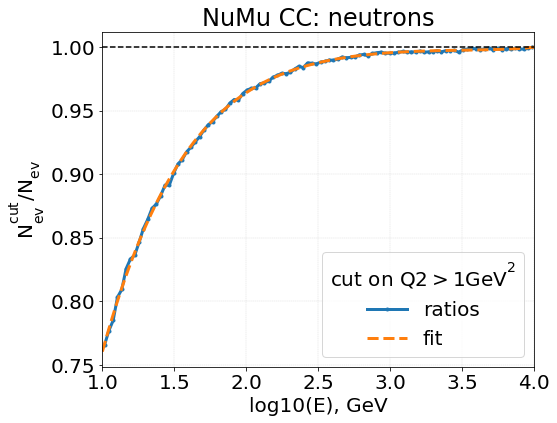

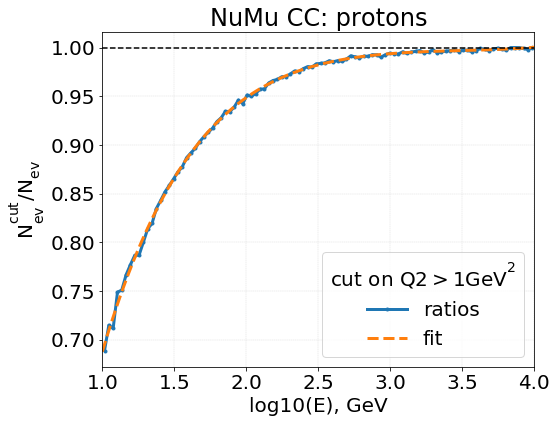

0

In [111]:
plot_and_save_ratio_cut(ind=ind_NuMu_CC_O_n_conc, title='NuMu CC: neutrons')
plot_and_save_ratio_cut(ind=ind_NuMu_CC_O_p_conc, title='NuMu CC: protons')

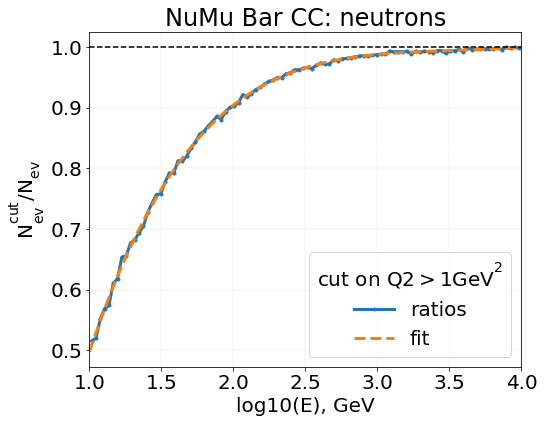

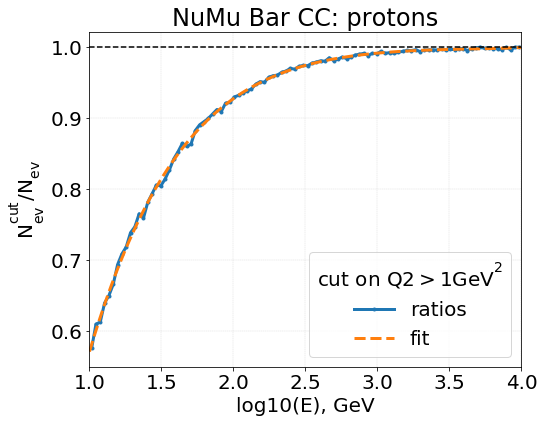

0

In [112]:
plot_and_save_ratio_cut(ind=ind_NuMu_Bar_CC_O_n_conc, title='NuMu Bar CC: neutrons')
plot_and_save_ratio_cut(ind=ind_NuMu_Bar_CC_O_p_conc, title='NuMu Bar CC: protons')

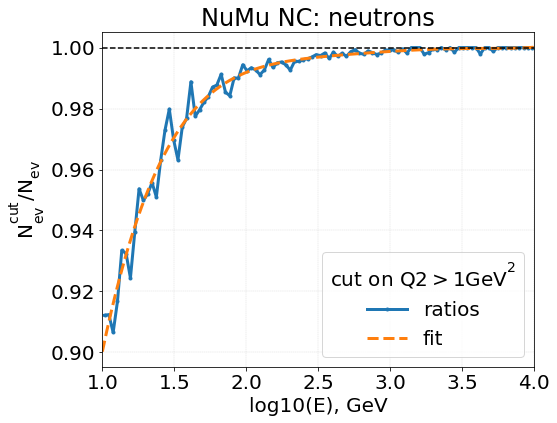

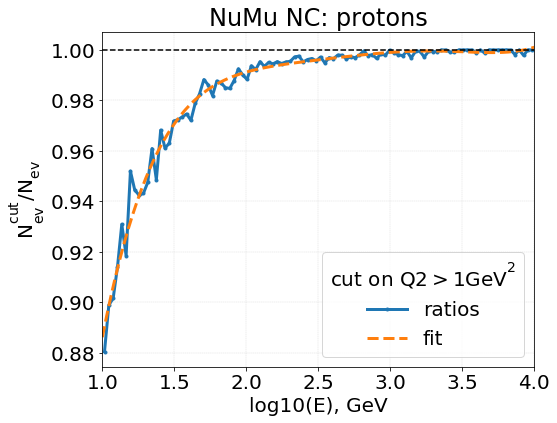

0

In [113]:
plot_and_save_ratio_cut(ind=ind_NuMu_NC_O_n_conc, title='NuMu NC: neutrons')
plot_and_save_ratio_cut(ind=ind_NuMu_NC_O_p_conc, title='NuMu NC: protons')

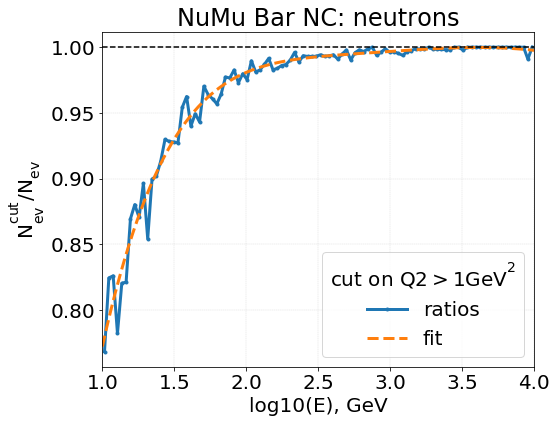

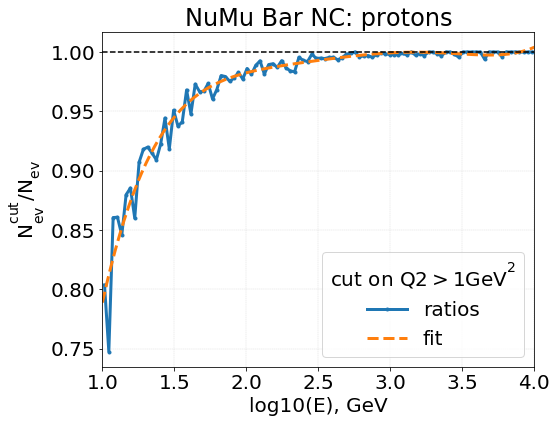

0

In [114]:
plot_and_save_ratio_cut(ind=ind_NuMu_Bar_NC_O_n_conc, title='NuMu Bar NC: neutrons')
plot_and_save_ratio_cut(ind=ind_NuMu_Bar_NC_O_p_conc, title='NuMu Bar NC: protons')